<a href="https://colab.research.google.com/github/flarsu/Amazon-Price-Notifier/blob/master/RePlastik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import os 
print(os.listdir('./'))




['.config', 'sample_data']


In [4]:
#Downloading Data from Kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission
!kaggle datasets download -d piaoya/plastic-recycling-codes #Kaggle Dataset used

Processing /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10/kaggle-1.5.10-cp36-none-any.whl
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10
kaggle.json
 98% 9.00M/9.19M [00:00<00:00, 52.6MB/s]
100% 9.19M/9.19M [00:00<00:00, 53.4MB/s]


In [5]:
!unzip plastic-recycling-codes.zip

Archive:  plastic-recycling-codes.zip
  inflating: seven_plastics/1_polyethylene_PET/85943598-ec9b-4da5-9221-8c32b5742e72.jpg  
  inflating: seven_plastics/1_polyethylene_PET/AORA7148.jpg  
  inflating: seven_plastics/1_polyethylene_PET/BBOZ2526.jpg  
  inflating: seven_plastics/1_polyethylene_PET/BIGI9753.jpg  
  inflating: seven_plastics/1_polyethylene_PET/FQCK7421.jpg  
  inflating: seven_plastics/1_polyethylene_PET/HSBT4561.jpg  
  inflating: seven_plastics/1_polyethylene_PET/IMG_6263.jpg  
  inflating: seven_plastics/1_polyethylene_PET/IMG_6268.jpg  
  inflating: seven_plastics/1_polyethylene_PET/IMG_6269.jpg  
  inflating: seven_plastics/1_polyethylene_PET/IMG_6271.jpg  
  inflating: seven_plastics/1_polyethylene_PET/IMG_6272.jpg  
  inflating: seven_plastics/1_polyethylene_PET/IMG_6308.jpg  
  inflating: seven_plastics/1_polyethylene_PET/IMG_6328.jpg  
  inflating: seven_plastics/1_polyethylene_PET/IMG_6336.jpg  
  inflating: seven_plastics/1_polyethylene_PET/IMG_63452.jpg  
  i

In [6]:
plasticImg = []
labels = []
print(os.listdir('seven_plastics'))
for f in os.listdir('seven_plastics'):
  for img in os.listdir('seven_plastics/'+f):
    plasticImg.append('seven_plastics/'+f+'/'+img) 
  labels.extend([int(f[0])-1]*len(os.listdir('seven_plastics/'+f)))
  
print(len(labels), len(plasticImg))
df = pd.DataFrame({'Plastic':plasticImg, 'Labels': labels})  

['3_polyvinylchloride_PVC', '7_other_resins', '1_polyethylene_PET', '8_no_plastic', '4_low_density_polyethylene_PE-LD', '6_polystyrene_PS', '5_polypropylene_PP', '2_high_density_polyethylene_PE-HD']
685 685


In [7]:
df = df.sample(frac=1)
df = df.reset_index(drop=True)

In [8]:
df.to_csv('plastic_dataset1.csv')

In [9]:
!pip install tez #library for basic code building model

In [10]:
import os
import albumentations
import matplotlib.pyplot as plt

import tez
from tez.datasets import ImageDataset
from tez.callbacks import EarlyStopping

import torch 
import torch.nn as nn
import torchvision

from sklearn import metrics, model_selection

%matplotlib inline

In [11]:
df.head()

,Plastic,Labels
0,seven_plastics/6_polystyrene_PS/IMG_6425.jpg,5
1,seven_plastics/2_high_density_polyethylene_PE-...,1
2,seven_plastics/7_other_resins/IMG_6313.jpg,6
3,seven_plastics/8_no_plastic/IMG_96855.jpg,7
4,seven_plastics/1_polyethylene_PET/PRYP7306.jpg,0


In [12]:
df.Labels.value_counts()

4    192
0    121
3     90
7     79
1     76
6     64
5     39
2     24
Name: Labels, dtype: int64

In [13]:
 df_train, df_valid = model_selection.train_test_split(
     df,
     test_size = 0.1,
     random_state = 42,
     stratify = df.Labels.values
 )

df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True) 

In [14]:
df_train.shape

(616, 2)

In [15]:
df_valid.shape

(69, 2)

In [16]:
train_image_paths = df_train.Plastic

valid_image_paths = df_valid.Plastic

In [17]:
train_targets = df_train.Labels.values
valid_targets = df_valid.Labels.values

In [18]:
train_dataset = ImageDataset(
    image_paths = train_image_paths,
    targets = train_targets,
    resize = (64,64),
    augmentations=None
)

In [19]:
train_dataset[10]

{'image': tensor([[[114., 114., 114.,  ..., 172., 172., 172.],
          [110., 110., 110.,  ..., 172., 172., 171.],
          [107., 106., 107.,  ..., 171., 170., 170.],
          ...,
          [ 82.,  80.,  80.,  ..., 114., 112., 116.],
          [ 86.,  83.,  82.,  ..., 102., 104., 106.],
          [ 87.,  84.,  82.,  ..., 112., 107., 108.]],
 
         [[102., 102., 102.,  ..., 147., 146., 145.],
          [ 98.,  98.,  98.,  ..., 147., 146., 144.],
          [ 95.,  94.,  95.,  ..., 146., 144., 143.],
          ...,
          [ 77.,  75.,  74.,  ...,  98.,  96.,  99.],
          [ 80.,  77.,  76.,  ...,  97.,  96.,  95.],
          [ 81.,  78.,  76.,  ..., 109., 102., 100.]],
 
         [[ 90.,  90.,  90.,  ..., 117., 117., 118.],
          [ 86.,  86.,  86.,  ..., 117., 117., 117.],
          [ 83.,  82.,  83.,  ..., 116., 116., 116.],
          ...,
          [ 83.,  80.,  79.,  ...,  94.,  91.,  94.],
          [ 82.,  79.,  78.,  ..., 102., 101.,  97.],
          [ 83.,  80.,

In [20]:
def plot_img(img_dict):
  img_tensor = img_dict['image']
  target = img_dict['targets']
  print(target)
  plt.figure(figsize=(3,3))
  image = img_tensor.permute(1,2,0)/255
  plt.imshow(image)

tensor(1)


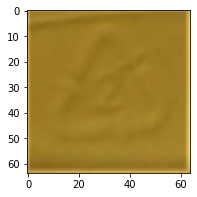

In [21]:
plot_img(train_dataset[2])

In [22]:
train_aug = albumentations.Compose(
    [
     albumentations.Transpose(p=0.5),
     albumentations.HorizontalFlip(p=0.5),
     albumentations.VerticalFlip(p=0.5)
    ]
)

valid_aug = albumentations.Compose(
    [
     albumentations.CenterCrop(64,64, p=1.0),
     albumentations.Resize(64,64),
     albumentations.Transpose(p=0.5),
     albumentations.HorizontalFlip(p=0.5),
     albumentations.VerticalFlip(p=0.5)
    ]
)

train_dataset = ImageDataset(
    image_paths = train_image_paths,
    targets = train_targets,
    resize = (64,64),
    augmentations=train_aug
)

valid_dataset = ImageDataset(
    image_paths = valid_image_paths,
    targets = valid_targets,
    resize = None,
    augmentations=valid_aug
)

tensor(1)


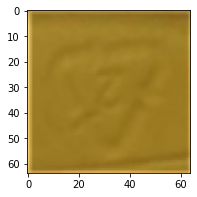

In [23]:
plot_img(train_dataset[2])

In [24]:
class PlasticModel(tez.Model):
  def __init__(self, num_classes, pretrained=True):
    super().__init__()
    self.convnet = torchvision.models.resnet50(pretrained=pretrained)
    self.convnet.fc = nn.Linear(2048, num_classes)
    self.step_scheduler_after = 'epoch'

  def loss(self,outputs, targets):
    if targets == None:
      return None
    return nn.CrossEntropyLoss()(outputs, targets) 
  
  def monitor_metrics(self, outputs, targets):
        if targets is None:
            return {}
        outputs = torch.argmax(outputs, dim=1).cpu().detach().numpy()
        targets = targets.cpu().detach().numpy()
        accuracy = metrics.accuracy_score(targets, outputs)
        return {"accuracy": accuracy}
  
  def fetch_optimizer(self):
    opt = torch.optim.Adam(self.parameters(), lr=1e-3)
    return opt

  def fetch_scheduler(self):
    sch = torch.optim.lr_scheduler.StepLR(self.optimizer, step_size=0.7)
    return sch      
  def forward(self, image, targets=None):
    outputs = self.convnet(image)
    if targets is not None:
      loss = self.loss(outputs, targets)
      mon_metrics =self.monitor_metrics(outputs, targets)
      return outputs, loss, mon_metrics
    outputs, None, None  

In [25]:
model = PlasticModel(num_classes=df.Labels.nunique(), pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [26]:
img = train_dataset[0]['image']
y = train_dataset[0]['targets']
model(img.unsqueeze(0), y.unsqueeze(0))

(tensor([[-0.1182,  0.0434,  0.3069,  0.0705, -0.3115,  0.0323, -0.1790,  0.0887]],
        grad_fn=<AddmmBackward>),
 tensor(2.0434, grad_fn=<NllLossBackward>),
 {'accuracy': 0.0})

In [27]:
es = EarlyStopping(monitor='valid_accuracy',
                   model_path = 'plastic_model.pth',
                   patience=10,
                   mode='max')
model.fit(
    train_dataset,
    valid_dataset=valid_dataset,
    train_bs=16,
    valid_bs=32,
    device = 'cuda',
    callbacks=[es],
    fp16=True,
    epochs = 20
) 


Validation score improved (-inf --> 0.1875). Saving model!



Validation score improved (0.1875 --> 0.27499999999999997). Saving model!



EarlyStopping counter: 1 out of 10



EarlyStopping counter: 2 out of 10



EarlyStopping counter: 3 out of 10



EarlyStopping counter: 4 out of 10



EarlyStopping counter: 5 out of 10



EarlyStopping counter: 6 out of 10



EarlyStopping counter: 7 out of 10



EarlyStopping counter: 8 out of 10



EarlyStopping counter: 9 out of 10



EarlyStopping counter: 10 out of 10


<generator object Model.predict at 0x7fd8b072a150>
